In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from datetime import datetime, timedelta
from sklearn.tree import DecisionTreeRegressor

In [2]:
data = pd.read_csv(r"JaipurFinalCleanData.csv")
data

,date,meantempm,maxtempm,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,...,mindewptm_3,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3
0,2016-05-04,34,41,27,35.0,36.0,34.0,6.0,4.0,-1.0,...,-10.0,1009.0,1008.0,1009.0,1000.0,1001.0,999.0,0.0,0.0,0.0
1,2016-05-05,31,38,24,34.0,35.0,36.0,7.0,6.0,4.0,...,-2.0,1008.0,1009.0,1008.0,1001.0,1000.0,1001.0,0.0,0.0,0.0
2,2016-05-06,28,34,21,31.0,34.0,35.0,11.0,7.0,6.0,...,-2.0,1011.0,1008.0,1009.0,1003.0,1001.0,1000.0,5.0,0.0,0.0
3,2016-05-07,30,38,23,28.0,31.0,34.0,13.0,11.0,7.0,...,0.0,1011.0,1011.0,1008.0,1004.0,1003.0,1001.0,0.0,5.0,0.0
4,2016-05-08,34,41,26,30.0,28.0,31.0,10.0,13.0,11.0,...,6.0,1010.0,1011.0,1011.0,1002.0,1004.0,1003.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,2018-03-07,24,32,15,22.0,23.0,25.0,4.0,7.0,8.0,...,2.0,1018.0,1017.0,1018.0,1012.0,1011.0,1007.0,0.0,0.0,0.0
672,2018-03-08,24,32,15,24.0,22.0,23.0,2.0,4.0,7.0,...,0.0,1017.0,1018.0,1017.0,1011.0,1012.0,1011.0,0.0,0.0,0.0
673,2018-03-09,26,33,19,24.0,24.0,22.0,1.0,2.0,4.0,...,-3.0,1017.0,1017.0,1018.0,1011.0,1011.0,1012.0,0.0,0.0,0.0
674,2018-03-10,26,34,19,26.0,24.0,24.0,3.0,1.0,2.0,...,-6.0,1017.0,1017.0,1017.0,1009.0,1011.0,1011.0,0.0,0.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             676 non-null    object 
 1   meantempm        676 non-null    int64  
 2   maxtempm         676 non-null    int64  
 3   mintempm         676 non-null    int64  
 4   meantempm_1      676 non-null    float64
 5   meantempm_2      676 non-null    float64
 6   meantempm_3      676 non-null    float64
 7   meandewptm_1     676 non-null    float64
 8   meandewptm_2     676 non-null    float64
 9   meandewptm_3     676 non-null    float64
 10  meanpressurem_1  676 non-null    float64
 11  meanpressurem_2  676 non-null    float64
 12  meanpressurem_3  676 non-null    float64
 13  maxhumidity_1    676 non-null    float64
 14  maxhumidity_2    676 non-null    float64
 15  maxhumidity_3    676 non-null    float64
 16  minhumidity_1    676 non-null    float64
 17  minhumidity_2   

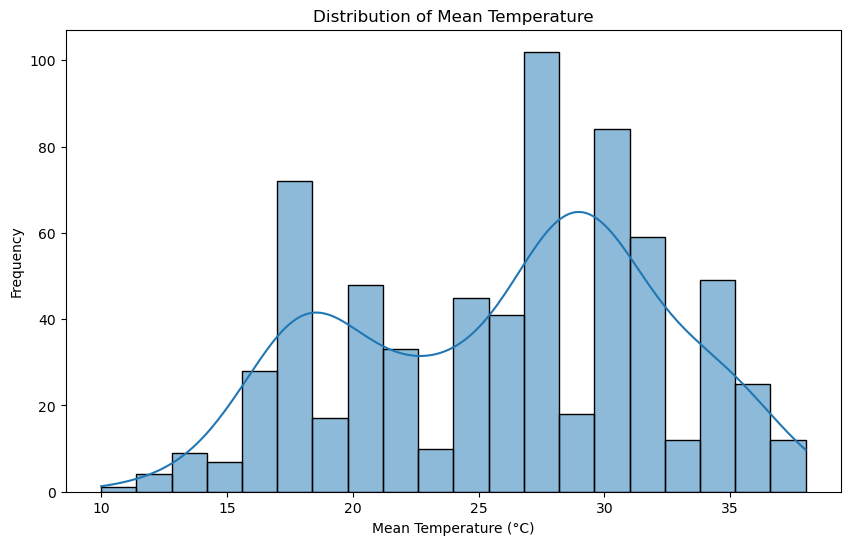

In [4]:
# Plot a histogram of 'meantempm' column
plt.figure(figsize=(10, 6))
sns.histplot(data['meantempm'], bins=20, kde=True)
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Temperature')
plt.show()

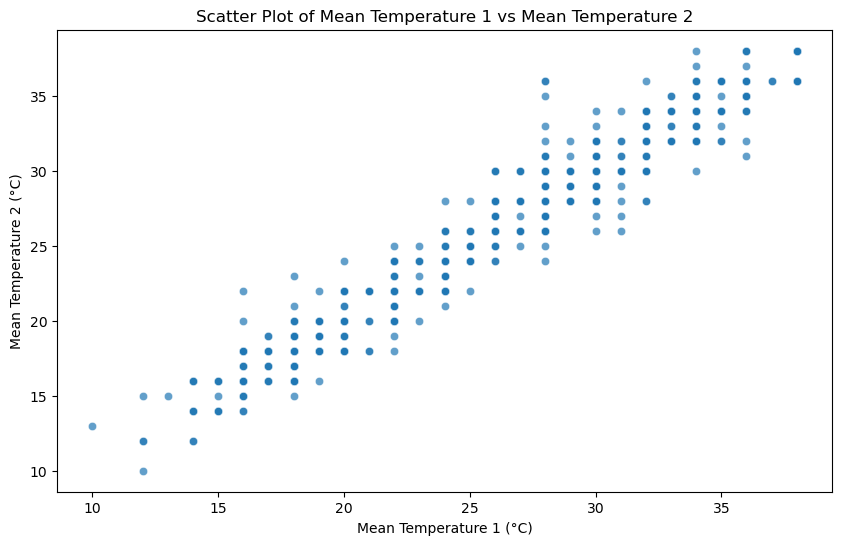

In [5]:
# Plot a scatter plot of 'meantempm_1' vs 'meantempm_2'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='meantempm_1', y='meantempm_2', alpha=0.7)
plt.xlabel('Mean Temperature 1 (°C)')
plt.ylabel('Mean Temperature 2 (°C)')
plt.title('Scatter Plot of Mean Temperature 1 vs Mean Temperature 2')
plt.show()

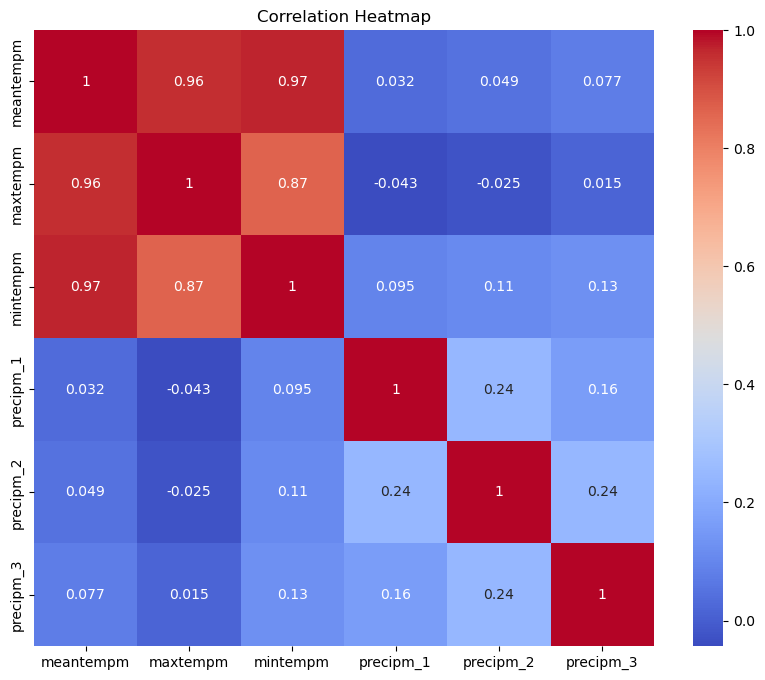

In [6]:
# Create a correlation heatmap for selected columns
selected_columns = ['meantempm', 'maxtempm', 'mintempm', 'precipm_1', 'precipm_2', 'precipm_3']
correlation_matrix = data[selected_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Train and Test

In [7]:
# Select features and target variable
X = data[['maxtempm', 'mintempm', 'precipm_1', 'precipm_2', 'precipm_3']]
y = data['meantempm']

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Mean Squared Error: {mse_lr}")

# Calculate Mean Absolute Error (MAE)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f"Mean Absolute Error (MAE): {mae_lr}")

# Calculate Root Mean Squared Error (RMSE)
rmse_lr = sqrt(mse_lr)
print(f"Root Mean Squared Error (RMSE): {rmse_lr}")

Mean Squared Error: 0.1394095149754047
Mean Absolute Error (MAE): 0.28960402166786614
Root Mean Squared Error (RMSE): 0.373375836089328


In [10]:
# Create and train the Support Vector Machine (SVM) model
svm_model = SVR(kernel='linear')  # You can choose the kernel type, e.g., 'linear', 'rbf', etc.
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f"Mean Squared Error (SVM): {mse_svm}")

# Calculate Mean Absolute Error (MAE)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
print(f"Mean Absolute Error (SVM): {mae_svm}")

# Calculate Root Mean Squared Error (RMSE)
rmse_svm = sqrt(mse_svm)
print(f"Root Mean Squared Error (SVM): {rmse_svm}")

Mean Squared Error (SVM): 0.14710477899688937
Mean Absolute Error (SVM): 0.31979718029585025
Root Mean Squared Error (SVM): 0.38354240834214065


In [11]:
# Create and train the Decision Tree model
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the Decision Tree model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Mean Squared Error (Decision Tree): {mse_dt}")

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print(f"Mean Absolute Error (Decision Tree): {mae_dt}")

# Calculate Root Mean Squared Error (RMSE)
rmse_dt = sqrt(mse_dt)
print(f"Root Mean Squared Error (Decision Tree): {rmse_dt}")

Mean Squared Error (Decision Tree): 0.19852941176470587
Mean Absolute Error (Decision Tree): 0.13970588235294118
Root Mean Squared Error (Decision Tree): 0.4455663943395034


In [12]:
# Create a dictionary to store the performance metrics
performance_dict = {
    'Model': ['Linear Regression', 'Support Vector Machine', 'Decision Tree'],
    'Mean Squared Error (MSE)': [mse_lr, mse_svm, mse_dt],
    'Mean Absolute Error (MAE)': [mae_lr, mae_svm, mae_dt],
    'Root Mean Squared Error (RMSE)': [rmse_lr, rmse_svm, rmse_dt]
}

# Create a pandas DataFrame from the dictionary
performance_df = pd.DataFrame(performance_dict)

# Display the performance table
performance_df

,Model,Mean Squared Error (MSE),Mean Absolute Error (MAE),Root Mean Squared Error (RMSE)
0,Linear Regression,0.139410,0.289604,0.373376
1,Support Vector Machine,0.147105,0.319797,0.383542
2,Decision Tree,0.198529,0.139706,0.445566


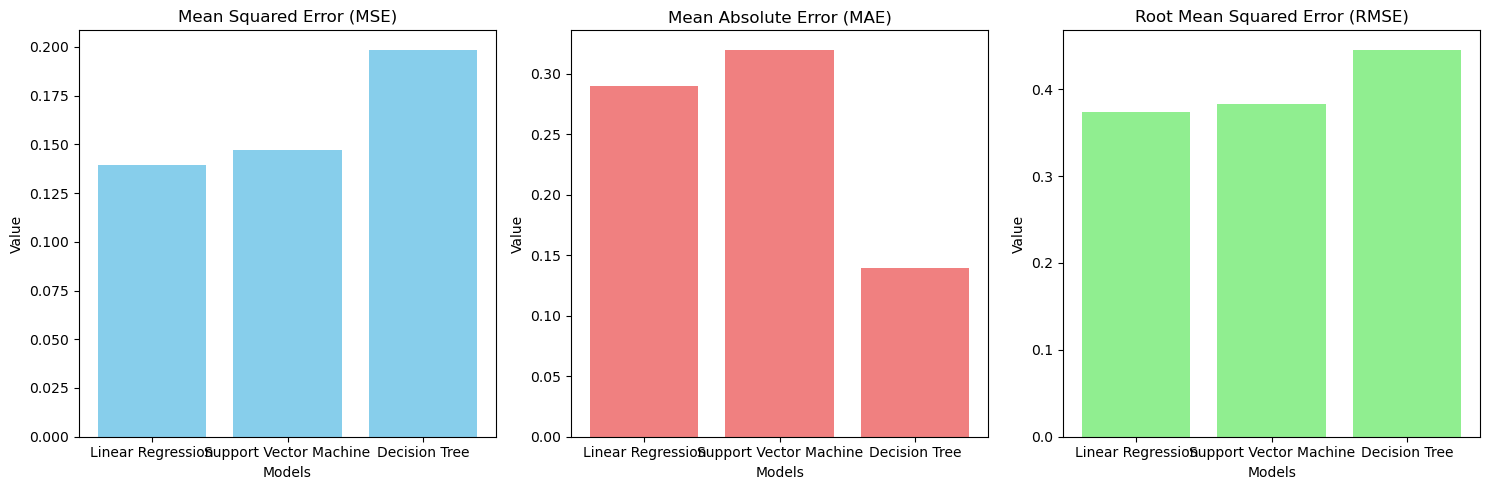

In [13]:
# Data
models = ['Linear Regression', 'Support Vector Machine', 'Decision Tree']
mse_values = [mse_lr, mse_svm, mse_dt]
mae_values = [mae_lr, mae_svm, mae_dt]
rmse_values = [rmse_lr, rmse_svm, rmse_dt]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot MSE
axes[0].bar(models, mse_values, color='skyblue')
axes[0].set_title('Mean Squared Error (MSE)')
axes[0].set_xlabel('Models')
axes[0].set_ylabel('Value')

# Plot MAE
axes[1].bar(models, mae_values, color='lightcoral')
axes[1].set_title('Mean Absolute Error (MAE)')
axes[1].set_xlabel('Models')
axes[1].set_ylabel('Value')

# Plot RMSE
axes[2].bar(models, rmse_values, color='lightgreen')
axes[2].set_title('Root Mean Squared Error (RMSE)')
axes[2].set_xlabel('Models')
axes[2].set_ylabel('Value')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()